# Data Visualisation

## 6 - Variant frequency comparisons

In [43]:
# Change working directory

import os
os.chdir(r"C:\Users\User\Desktop\Megan\MSC2\Results\5._Posthoc_analysis\Pipeline_GnomAD_SAHGP_14032023\Genomic_data_analysis\Analysis\Visualisation")

In [44]:
# Import modules and packages

import os
import numpy as np
import pandas as pd
import seaborn as sns
import upsetplot
from matplotlib import pyplot as plt
import plotly.express as px

import sys

sys.path.append(
    r"C:\Users\User\Desktop\Megan\MSC2\Results\5._Posthoc_analysis\Pipeline_GnomAD_SAHGP_14032023\Genomic_data_analysis"
)
import Utils.constants as constants
import Utils.functions as functions

In [45]:
# Set plot figure area and font size
sns.set(rc={"figure.figsize": (10, 8)})

plt.rc("font", size=constants.MEDIUM_FONT)  # controls default text sizes
plt.rc("axes", titlesize=constants.MEDIUM_FONT)  # fontsize of the axes title
plt.rc("axes", labelsize=constants.BIGGER_FONT)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=constants.MEDIUM_FONT)  # fontsize of the tick labels
plt.rc("ytick", labelsize=constants.MEDIUM_FONT)  # fontsize of the tick labels
plt.rc("legend", fontsize=constants.SMALL_FONT)  # legend fontsize
plt.rc("figure", titlesize=constants.BIGGER_FONT)  # fontsize of the figure title

### Data imports

In [46]:
# Import ALFA and in-house averaged population allele frequency data
ih_alfa = pd.read_csv(
    os.path.join(
        constants.HOME_PATH,
        "Data",
        "Processed",
        "IH_ALFA_allele_counts.csv",
    )
).drop(columns="Unnamed: 0")

In [47]:
ih_alfa


,UNIQUE_VARIANT_NAME,ID,REF,ALT,GENE,POS,ALT_CT_IH_ACB,ALT_CT_IH_ASW,ALT_CT_IH_African,ALT_CT_IH_CA,...,REF_CT_ALFA_African Others,REF_CT_ALFA_Asian,REF_CT_ALFA_East Asian,REF_CT_ALFA_European,REF_CT_ALFA_Latin American 1,REF_CT_ALFA_Latin American 2,REF_CT_ALFA_Other,REF_CT_ALFA_Other Asian,REF_CT_ALFA_South Asian,REF_CT_ALFA_Total
0,110148891_G_C,rs552586867,C,G,COL4A1,110148891,0,0,2,0,...,114.0,112.0,86.0,9690.0,146.0,610.0,496.0,26.0,98.0,14050.0
1,110148917_G_C,rs59409892,C,G,COL4A1,110148917,26,14,193,5,...,105.0,112.0,86.0,9824.0,145.0,605.0,674.0,26.0,98.0,14153.0
2,110148920_C_G,rs535182970,G,C,COL4A1,110148920,1,0,1,0,...,114.0,112.0,86.0,9690.0,146.0,610.0,496.0,26.0,98.0,14050.0
3,110148959_G_A,rs56406633,A,G,COL4A1,110148959,1,0,1,0,...,114.0,108.0,83.0,13842.0,141.0,588.0,671.0,25.0,95.0,18377.0
4,110148971_C_G,rs568536001,G,C,COL4A1,110148971,1,0,1,0,...,114.0,112.0,86.0,9690.0,146.0,610.0,496.0,26.0,98.0,14050.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14910,48256168_T_C,rs557536580,C,T,CARD8,48256168,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14911,48256295_A_T,rs577390425,T,A,CARD8,48256295,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14912,48256333_CT_C,rs572886934,C,CT,CARD8,48256333,13,6,150,15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14913,48256361_T_C,rs539855566,C,T,CARD8,48256361,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
# Import in-house sub-population allele frequency data

ih_allele_counts = pd.read_csv(
    os.path.join(
        constants.HOME_PATH,
        "Data",
        "Processed",
        "IH_allele_counts.csv",
    )
).drop(columns=["Unnamed: 0"])

In [49]:
# Import multiple testing-corrected Fisher's data

corrected_fishers = pd.read_csv(
    os.path.join(
        constants.HOME_PATH,
        "Results",
        "Stats",
        "Fishers_multipletestcorrection_bonf_wd.csv",
    )
).drop(columns="Unnamed: 0")


In [50]:
# Import variant positional information

# Add gene and positional information

# Import gene and positional data from CSV file
gene_positional_data = pd.read_csv(
    os.path.join(
        constants.HOME_PATH,
        "Data",
        "Processed",
        "Variant_types_and_consequences.csv",
    ), usecols=["ID", "REF", "ALT", "POS", "GENE"]
)

### Comparison of recent African allele frequencies generated in-house to recent African, EUR and EAS frequencies generated by the NCBI ALFA project.

Only variants with rsIDs are included. Both original and corrected in-house allele frequencies were plotted in comparison to ALFA variants.

In [51]:
# Add frequencies for in-house Recent African and ALFA African, EUR and EAS data
ih_alfa["IH_Recent African_ALT_AF"] = ih_alfa["ALT_CT_IH_Recent African"]/(ih_alfa["ALT_CT_IH_Recent African"] + ih_alfa["REF_CT_IH_Recent African"])
ih_alfa["CORR_IH_Recent African_ALT_AF"] = ih_alfa["ALT_CT_IH_Recent African"]/(ih_alfa["ALT_CT_IH_Recent African"] + ih_alfa["CORR_REF_CT_IH_Recent African"])
ih_alfa["ALFA_African Others_ALT_AF"] = ih_alfa["ALT_CT_ALFA_African Others"]/(ih_alfa["ALT_CT_ALFA_African Others"] + ih_alfa["REF_CT_ALFA_African Others"])
ih_alfa["ALFA_East Asian_ALT_AF"] = ih_alfa["ALT_CT_ALFA_East Asian"]/(ih_alfa["ALT_CT_ALFA_East Asian"] + ih_alfa["REF_CT_ALFA_East Asian"])
ih_alfa["ALFA_South Asian_ALT_AF"] = ih_alfa["ALT_CT_ALFA_South Asian"]/(ih_alfa["ALT_CT_ALFA_South Asian"] + ih_alfa["REF_CT_ALFA_South Asian"])
ih_alfa["ALFA_European_ALT_AF"] = ih_alfa["ALT_CT_ALFA_European"]/(ih_alfa["ALT_CT_ALFA_European"] + ih_alfa["REF_CT_ALFA_European"])

In [52]:
# Subset data by comparison populations of interest
ih_alfa_comparisons = ih_alfa[["UNIQUE_VARIANT_NAME", "GENE", "CORR_IH_Recent African_ALT_AF", "ALFA_African Others_ALT_AF", "ALFA_East Asian_ALT_AF", "ALFA_South Asian_ALT_AF", "ALFA_European_ALT_AF"]]

# Replace missing frequencies with 0
ih_alfa_comparisons = ih_alfa_comparisons.replace(np.NAN, 0)

# Remove rows with frequencies of 0. Only want to include variants that are present in all comparison populations.
ih_alfa_comparisons = ih_alfa_comparisons[(ih_alfa_comparisons["CORR_IH_Recent African_ALT_AF"] != 0) & (ih_alfa_comparisons["ALFA_African Others_ALT_AF"] != 0) & (ih_alfa_comparisons["ALFA_European_ALT_AF"] != 0) & (ih_alfa_comparisons["ALFA_East Asian_ALT_AF"] != 0) & (ih_alfa_comparisons["ALFA_South Asian_ALT_AF"] != 0)]

ih_alfa_comparisons.head(5)

,UNIQUE_VARIANT_NAME,GENE,CORR_IH_Recent African_ALT_AF,ALFA_African Others_ALT_AF,ALFA_East Asian_ALT_AF,ALFA_South Asian_ALT_AF,ALFA_European_ALT_AF
29,110149776_T_G,COL4A1,0.262681,0.168367,0.004016,0.039773,0.091209
113,110152180_T_C,COL4A1,0.002415,0.008772,0.034884,0.030612,0.031219
139,110152715_A_G,COL4A1,0.960145,0.932692,0.990196,0.853448,0.673701
181,110153931_A_G,COL4A1,0.009058,0.008772,0.050000,0.028846,0.030493
189,110154143_A_G,COL4A1,0.937802,0.920455,0.772563,0.925228,0.918489


C:\Users\User\Desktop\Megan\MSC2\Results\5._Posthoc_analysis\Pipeline_GnomAD_SAHGP_14032023\Genomic_data_analysis\Utils\functions.py:308: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  plot_output = sns.scatterplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


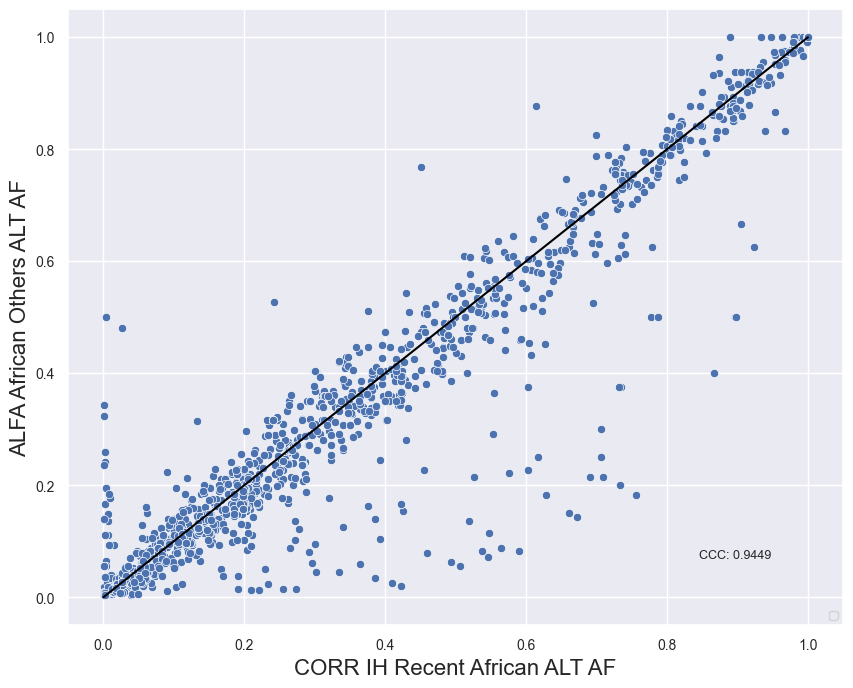

C:\Users\User\Desktop\Megan\MSC2\Results\5._Posthoc_analysis\Pipeline_GnomAD_SAHGP_14032023\Genomic_data_analysis\Utils\functions.py:308: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  plot_output = sns.scatterplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


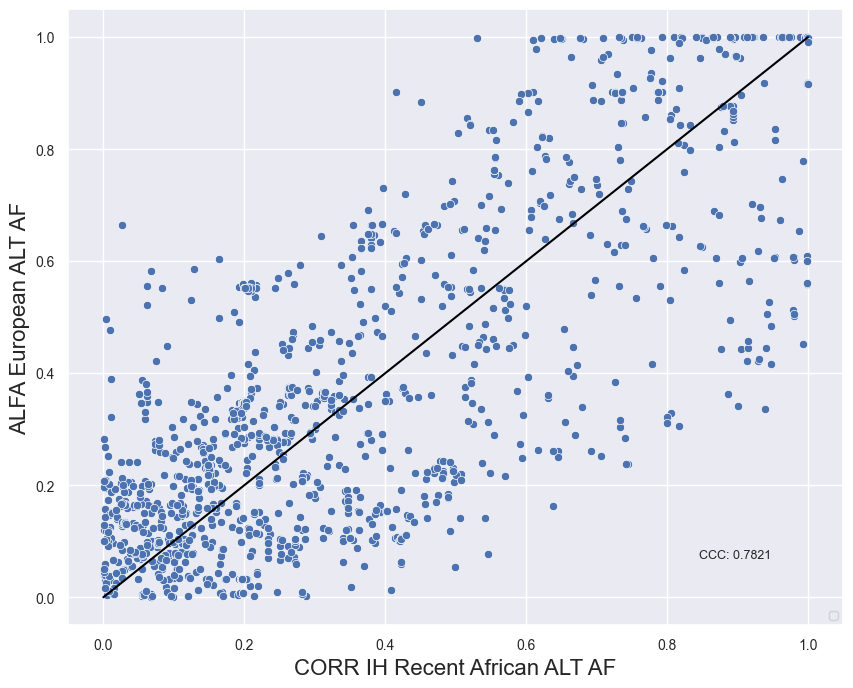

C:\Users\User\Desktop\Megan\MSC2\Results\5._Posthoc_analysis\Pipeline_GnomAD_SAHGP_14032023\Genomic_data_analysis\Utils\functions.py:308: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  plot_output = sns.scatterplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


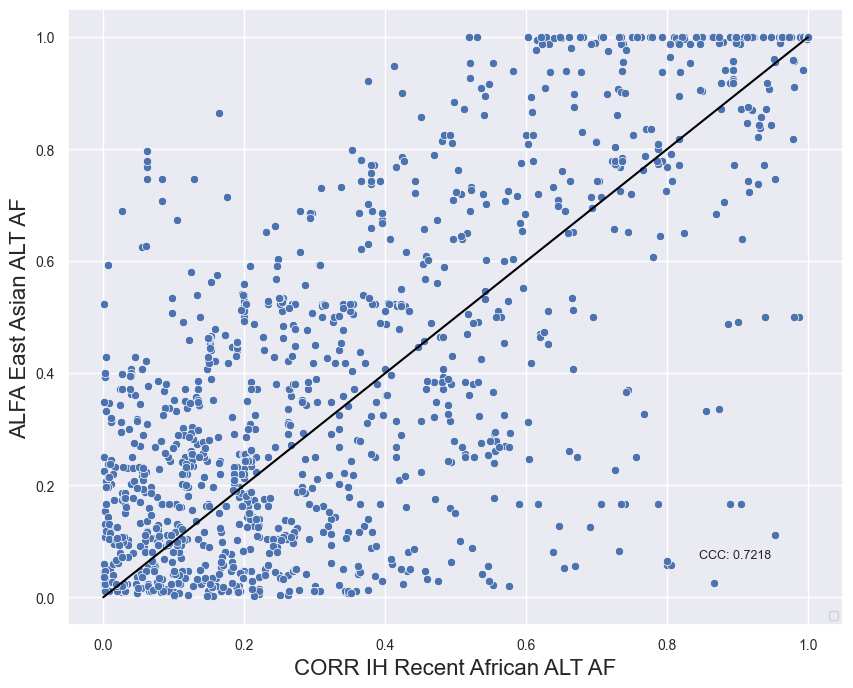

C:\Users\User\Desktop\Megan\MSC2\Results\5._Posthoc_analysis\Pipeline_GnomAD_SAHGP_14032023\Genomic_data_analysis\Utils\functions.py:308: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  plot_output = sns.scatterplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


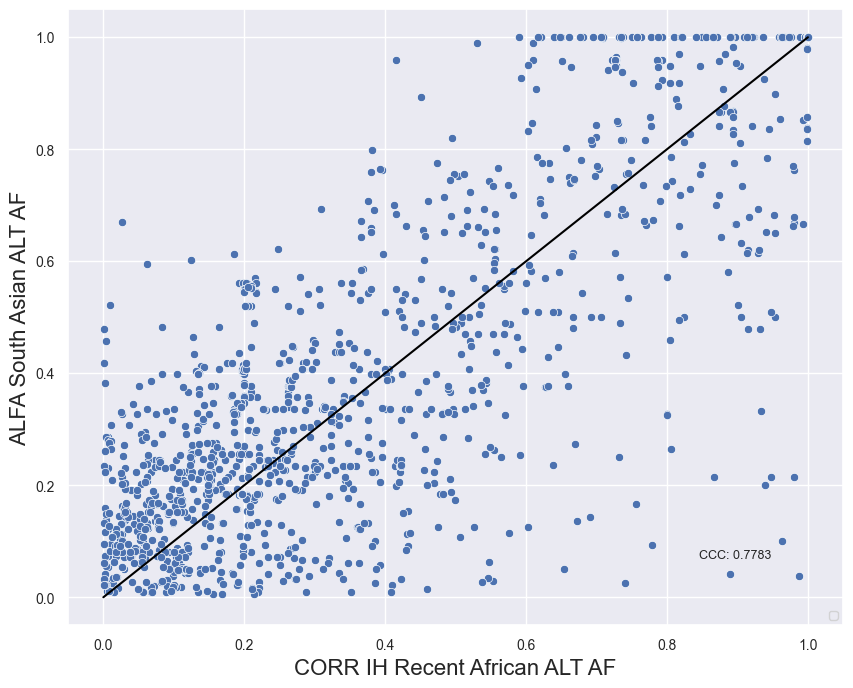

In [53]:
# Calculate the concordance correlation coefficient (CCC) for each comparison population pair. 
comparison_populations = [["CORR_IH_Recent African_ALT_AF", "ALFA_African Others_ALT_AF"], ["CORR_IH_Recent African_ALT_AF", "ALFA_European_ALT_AF"], ["CORR_IH_Recent African_ALT_AF", "ALFA_East Asian_ALT_AF"], ["CORR_IH_Recent African_ALT_AF", "ALFA_South Asian_ALT_AF"]]

for pair in comparison_populations:
    y_true = ih_alfa_comparisons[pair[1]]
    x_pred = ih_alfa_comparisons[pair[0]]
    ccc = round(functions.calculate_ccc(y_true, x_pred), 4)

    # Create a scatter plot with an identity line comparing the non-imputed in-house data to that of the alfa. Annotate the plot with the concordance correlation coefficients of the data.
    impute_scatter = functions.create_plot(plot_type="scatterplot", x=ih_alfa_comparisons[pair[0]], y=ih_alfa_comparisons[pair[1]], data=ih_alfa_comparisons, palette=sns.color_palette("mako", 1))
    impute_scatter.set(xlabel=pair[0].replace("_", " "), ylabel=pair[1].replace("_", " "))
    plt.plot([0,1],[0,1], color="black")
    plt.text(0.845, 0.07, 'CCC: ' + str(ccc), fontsize = 9)
    plt.legend(
        loc='lower right'
    )
    plt.savefig("..\..\Results\Figures\Allele_frequency_comparison_" + pair[0] + ", " + pair[1] + ".png", dpi=600)
    plt.show()

### Manhattan plots showing p-values for variant frequency differences for in-house and ALFA data

In [54]:
# Subset by comparison populations of interest
corrected_fishers_subset = corrected_fishers[["ID", "REF", "ALT", "PVALUE_IH_Recent African_ALFA_African Others", "PVALUE_IH_Recent African_ALFA_European", "PVALUE_IH_Recent African_ALFA_East Asian", "PVALUE_IH_Recent African_ALFA_South Asian"]]

# Merge gene and positional data with frequency information
corrected_fishers_subset = corrected_fishers_subset.merge(gene_positional_data, how="left", on=["ID", "REF", "ALT",])

corrected_fishers_subset

,ID,REF,ALT,PVALUE_IH_Recent African_ALFA_African Others,PVALUE_IH_Recent African_ALFA_European,PVALUE_IH_Recent African_ALFA_East Asian,PVALUE_IH_Recent African_ALFA_South Asian,POS,GENE
0,rs1000989,T,C,1.000000,4.800459e-15,1.000000e+00,2.159706e-05,110174956,COL4A1
1,rs1000990,T,C,1.000000,1.679713e-16,1.000000e+00,1.000000e+00,110174971,COL4A1
2,rs1005573,C,T,1.000000,9.820575e-64,4.429830e-30,1.750943e-01,33026408,OLIG2
3,rs1007311,A,G,1.000000,6.873836e-14,1.000000e+00,1.000000e+00,150998920,NOS3
4,rs1008140,T,C,1.000000,3.433850e-221,1.000000e+00,3.897442e-07,151008522,NOS3
...,...,...,...,...,...,...,...,...,...
1289,rs9805362,G,A,0.000107,0.000000e+00,6.495899e-19,1.318447e-08,110255937,COL4A1
1290,rs9805608,T,C,1.000000,3.621684e-58,1.000000e+00,2.692582e-13,110254294,COL4A1
1291,rs995223,T,C,1.000000,5.250042e-46,2.305299e-51,4.926804e-09,110198689,COL4A1
1292,rs995224,A,G,1.000000,5.760511e-01,1.119276e-03,1.298117e-01,110198495,COL4A1


In [55]:
# Demarcate whether variant has been associated with NESHIE

corrected_fishers_subset['NESHIE_ID?'] = np.where(corrected_fishers_subset.ID.isin(constants.NESHIE_RSIDS), 'Y', 'N')

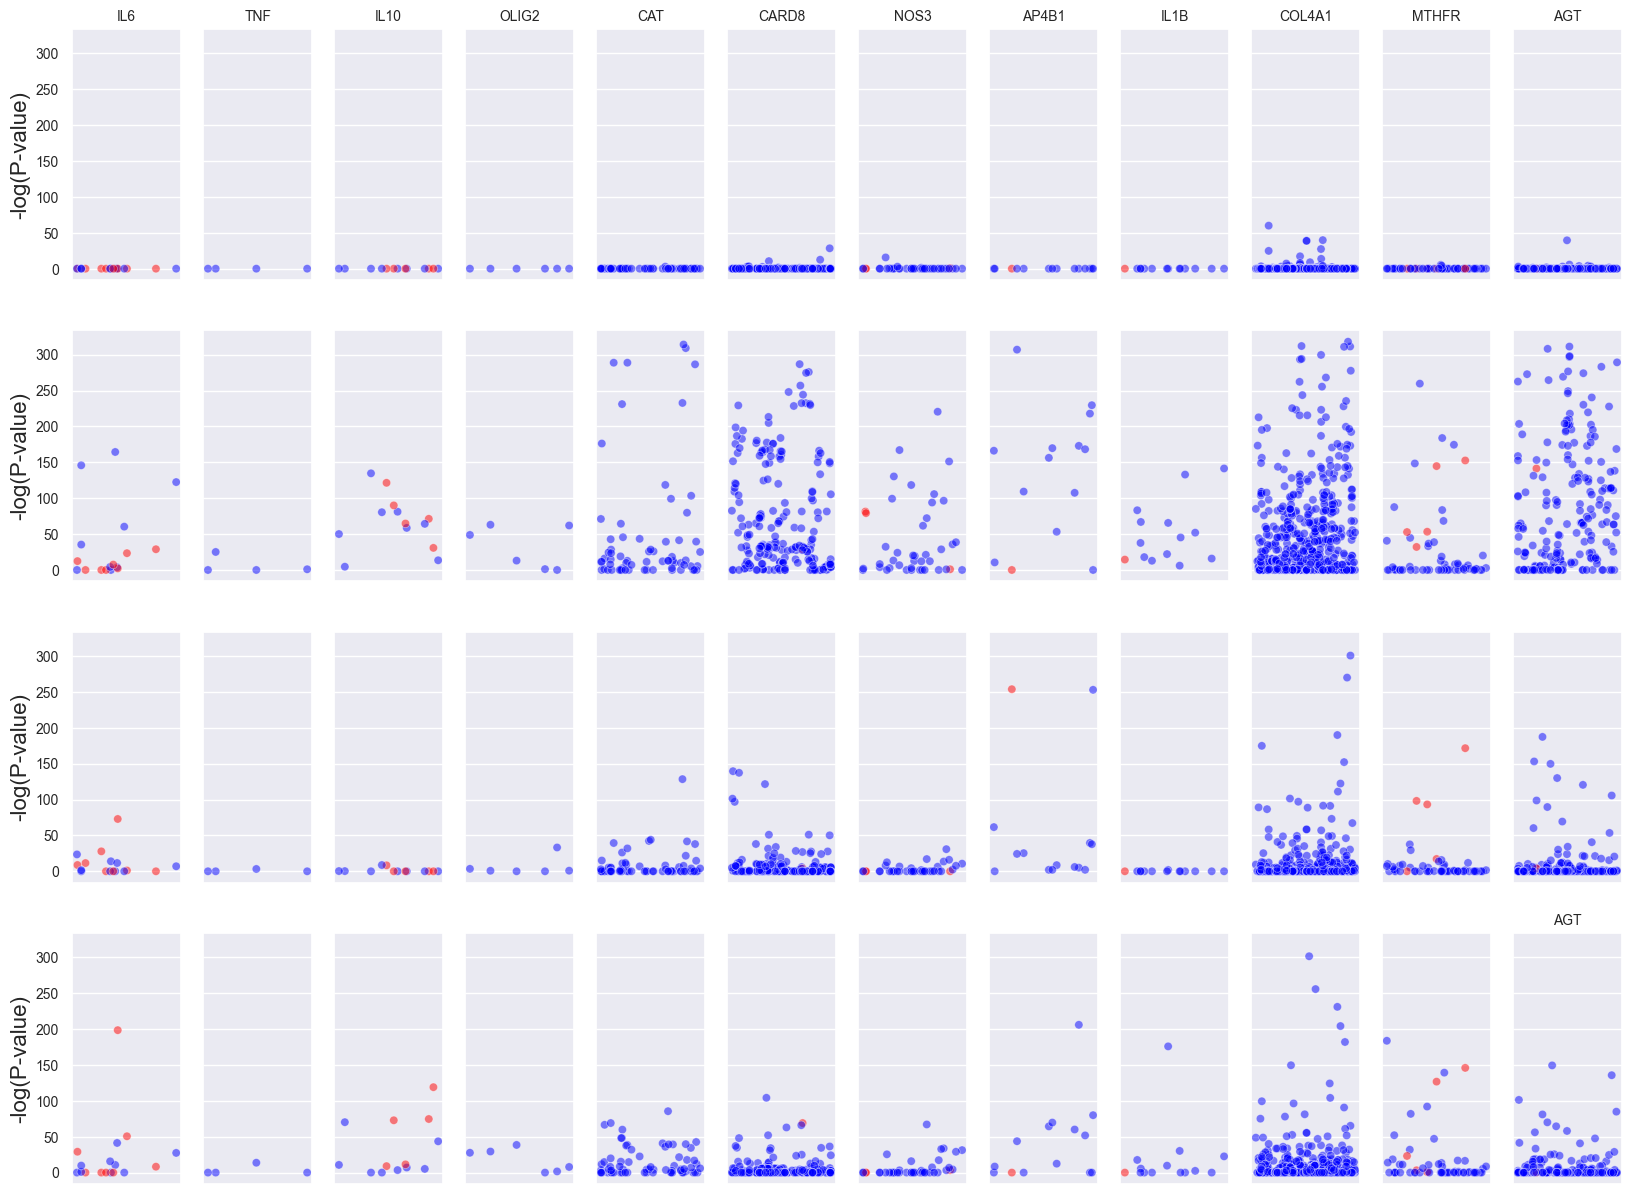

In [56]:
gene_list = list(set(corrected_fishers_subset['GENE'].values))
columns = [corrected_fishers_subset["PVALUE_IH_Recent African_ALFA_African Others"], corrected_fishers_subset["PVALUE_IH_Recent African_ALFA_European"], corrected_fishers_subset["PVALUE_IH_Recent African_ALFA_South Asian"], corrected_fishers_subset["PVALUE_IH_Recent African_ALFA_East Asian"]]

fig, ax = plt.subplots(4, 12, figsize = (20,15), sharey = 'all')

for r in range(4):
    y_value = columns[r]
    y = -np.log10(y_value, where = y_value>0)

    for c in range(12):
        gene = gene_list[c]
        sns.scatterplot(data= corrected_fishers_subset[corrected_fishers_subset.GENE == gene], x='POS', y=y, alpha=0.5, ax=ax[r,c], hue="NESHIE_ID?", palette={"Y": "Red", "N": "Blue"})
        plt.title(gene)
        
        ax[r, c].set_ylabel(None)
        ax[r, c].set_xlabel(None)
        ax[r, c].get_xaxis().set_visible(False)
        ax[0, c].set_title(gene)
        ax[r, 0].set_ylabel("-log(P-value)")
        ax[r, c].get_legend().remove()


Pin-point whether the NESHIE variants with significant population frequency differences are more common or rare compared to the other global populations. 

Which variants are common and have big differences in p-value? These variants may explain why NESHIE is more prevalent in the African pop compared to other global populations.

### Comparison of frequencies of NESHIE variants of interest for different African population groups

In [57]:
# Drop entries with region = null from ih_allele_counts dataframe. These entries provide summary counts for African and Recent African populations. These summary counts are not relevant for this purpose.
ih_allele_counts = ih_allele_counts.dropna()

# Pivot information
ih_allele_counts_pivot = ih_allele_counts.pivot(index=["ID", "REF", "ALT", "GENE"], columns="SUB_POP", values="CORR_IH_AF").reset_index()

ih_allele_counts_pivot.head(5)

SUB_POP,ID,REF,ALT,GENE,ACB,ASW,BantuKenya,BantuSouthAfrica,BiakaPygmy,COL,...,GWD,LWK,MSL,Mandenka,MbutiPygmy,SOT,San,XHO,YRI,Yoruba
0,chr11:34438836T-C,T,C,CAT,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.005155,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,chr11:34438889G-C,G,C,CAT,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.083333,0.0,0.0,0.0
2,chr11:34438910C-T,C,T,CAT,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,chr11:34439179A-G,A,G,CAT,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,chr11:34439188C-G,C,G,CAT,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [58]:
# Subset by NESHIE variants

NESHIE_allele_counts_pivot = ih_allele_counts_pivot[ih_allele_counts_pivot.ID.isin(constants.NESHIE_RSIDS)]

NESHIE_allele_counts_pivot.head(5)

SUB_POP,ID,REF,ALT,GENE,ACB,ASW,BantuKenya,BantuSouthAfrica,BiakaPygmy,COL,...,GWD,LWK,MSL,Mandenka,MbutiPygmy,SOT,San,XHO,YRI,Yoruba
8514,rs1071676,C,G,IL1B,0.140351,0.147887,0.291667,0.1250,0.153846,0.1250,...,0.207386,0.108247,0.107143,0.217391,0.071429,0.1250,0.333333,0.1250,0.100000,0.214286
9361,rs1217401,A,G,AP4B1,0.767544,0.753521,0.791667,0.8125,0.596154,0.3750,...,0.829545,0.778351,0.775510,0.956522,0.321429,0.8125,0.666667,0.5000,0.851429,0.809524
9865,rs1411040,C,T,COL4A1,0.855263,0.852113,0.708333,0.5625,0.730769,0.6250,...,0.869318,0.731959,0.867347,0.891304,0.535714,0.6250,0.916667,0.7500,0.834286,0.857143
10587,rs1476413,C,T,MTHFR,0.184211,0.140845,0.125000,0.2500,0.307692,NaN,...,0.116477,0.175258,0.142857,0.021739,0.178571,0.1250,0.333333,0.1250,0.111429,0.142857
10991,rs1518111,T,C,IL10,0.631579,0.626761,0.750000,0.6875,0.653846,0.7500,...,0.551136,0.597938,0.525510,0.391304,0.714286,0.7500,0.916667,0.5000,0.542857,0.452381
11002,rs1554286,A,G,IL10,0.640351,0.626761,0.750000,0.6875,0.653846,0.7500,...,0.551136,0.597938,0.525510,0.391304,0.714286,0.7500,0.916667,0.5000,0.548571,0.452381
11003,rs1554606,T,G,IL6,0.653509,0.683099,0.708333,0.8125,0.692308,0.9375,...,0.721591,0.762887,0.596939,0.608696,0.678571,0.7500,0.500000,0.6875,0.708571,0.714286
11132,rs1800779,G,A,NOS3,0.868421,0.845070,0.916667,0.8125,0.884615,0.6875,...,0.815341,0.850515,0.821429,0.717391,0.821429,0.9375,1.000000,0.6250,0.880000,0.809524
11137,rs1800795,C,G,IL6,0.934211,0.929577,1.000000,1.0000,1.000000,0.9375,...,0.994318,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.0000,1.000000,1.000000
11138,rs1800796,G,C,IL6,0.096491,0.063380,0.208333,0.1250,NaN,0.3750,...,0.102273,0.216495,0.071429,0.065217,NaN,0.1250,0.083333,0.0625,0.094286,0.095238


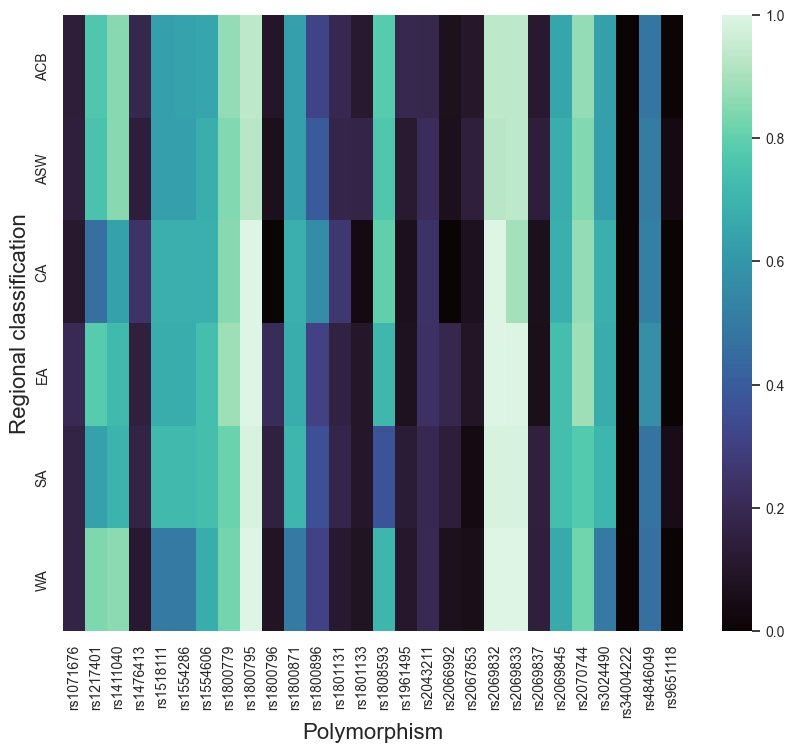

In [18]:
# Create a dataframe with allele frequency data in suitable format for heatmap
heatmap_af_data = NESHIE_allele_counts_pivot.melt(
    id_vars=["ID", "REF", "ALT", "GENE"], value_vars=constants.SUB_POPULATIONS, var_name="SUB_POP", value_name="ALT_AF"
)

# Add regional classification information
heatmap_af_data["REG"] = heatmap_af_data["SUB_POP"].map(constants.LD_REGIONAL_CLASSIFICATION)
heatmap_af_grouped = heatmap_af_data.groupby(["ID", "REG", "REF", "ALT"], as_index=False).mean(numeric_only=True)

# Pivot dataframe
heatmap_af = heatmap_af_grouped.pivot(
    index="REG", columns=["ID"], values="ALT_AF"
).replace(np.NaN, 0.0)

# Make heatmap
sns.heatmap(heatmap_af, cmap="mako")
plt.xlabel("Polymorphism")
plt.ylabel("Regional classification")
plt.savefig("..\..\Results\Figures\NESHIE_variant_frequencies.png", dpi=1200)
plt.show()